<a href="https://colab.research.google.com/github/iraseel74/mining-project/blob/main/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

data mining Technique

Classification:

Information Gain (entropy):

Splitting Data into: 60% Training and 40% Test
The model is trained utilizing the information gain(entropy)
and Gini index.

same thing with dividing 70%-30% and 80%-20%


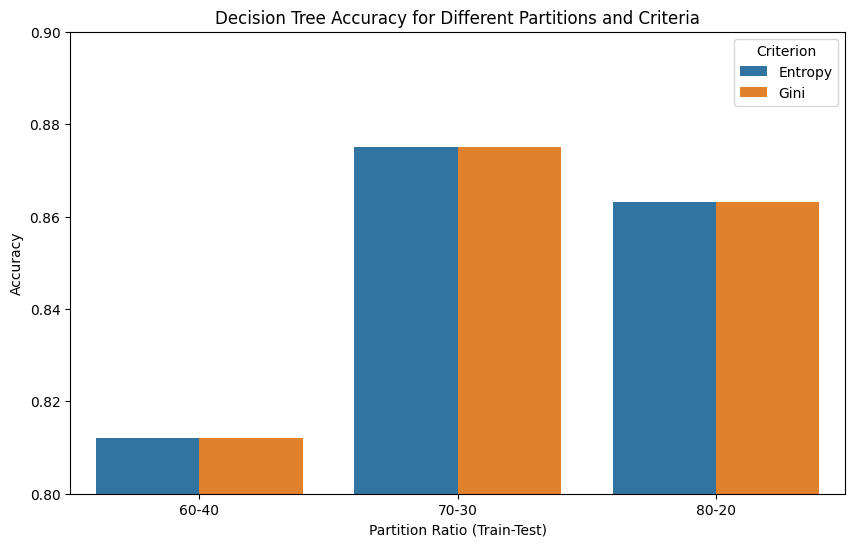

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Processed_dataset.csv')

# Convert categorical columns to numeric using Label Encoding
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le



# Define partition sizes and attribute selection criteria
partition_ratios = [0.6, 0.7, 0.8]
criteria = ['entropy', 'gini']

# Prepare lists to store results
results = {'Partition': [], 'Criterion': [], 'Accuracy': []}

# Separate features and target variable
X = data.drop(columns=['G3'])
y = data['G3']

# Iterate through each partition size and criterion
for ratio in partition_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-ratio, random_state=42)

    for criterion in criteria:
        # Initialize and train the decision tree model
        model = DecisionTreeClassifier(criterion=criterion, random_state=42)
        model.fit(X_train, y_train)

        # Make predictions and calculate accuracy
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Store results
        results['Partition'].append(f'{int(ratio * 100)}-{100 - int(ratio * 100)}')
        results['Criterion'].append(criterion.capitalize())
        results['Accuracy'].append(accuracy)

# Convert results to a DataFrame for easier analysis and display
results_df = pd.DataFrame(results)
results_df

# Set up the visual representation of results
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Partition', y='Accuracy', hue='Criterion')
plt.title('Decision Tree Accuracy for Different Partitions and Criteria')
plt.ylabel('Accuracy')
plt.xlabel('Partition Ratio (Train-Test)')
plt.ylim(0.8, 0.9)  # Adjust y-axis for clarity
plt.legend(title='Criterion')
plt.show()

This chart shows how well a model predicts correctly when using different data splits and methods.

Data Split (Train-Test):

We split the data into training (to teach the model) and testing (to check accuracy).

70-30 split (70% training, 30% testing) worked best, giving the highest accuracy.

Methods (Entropy and Gini):

These are two different ways the model makes decisions.

Both methods performed about the same at each split.

The model was most accurate with the 70-30 split, and both methods worked similarly well.


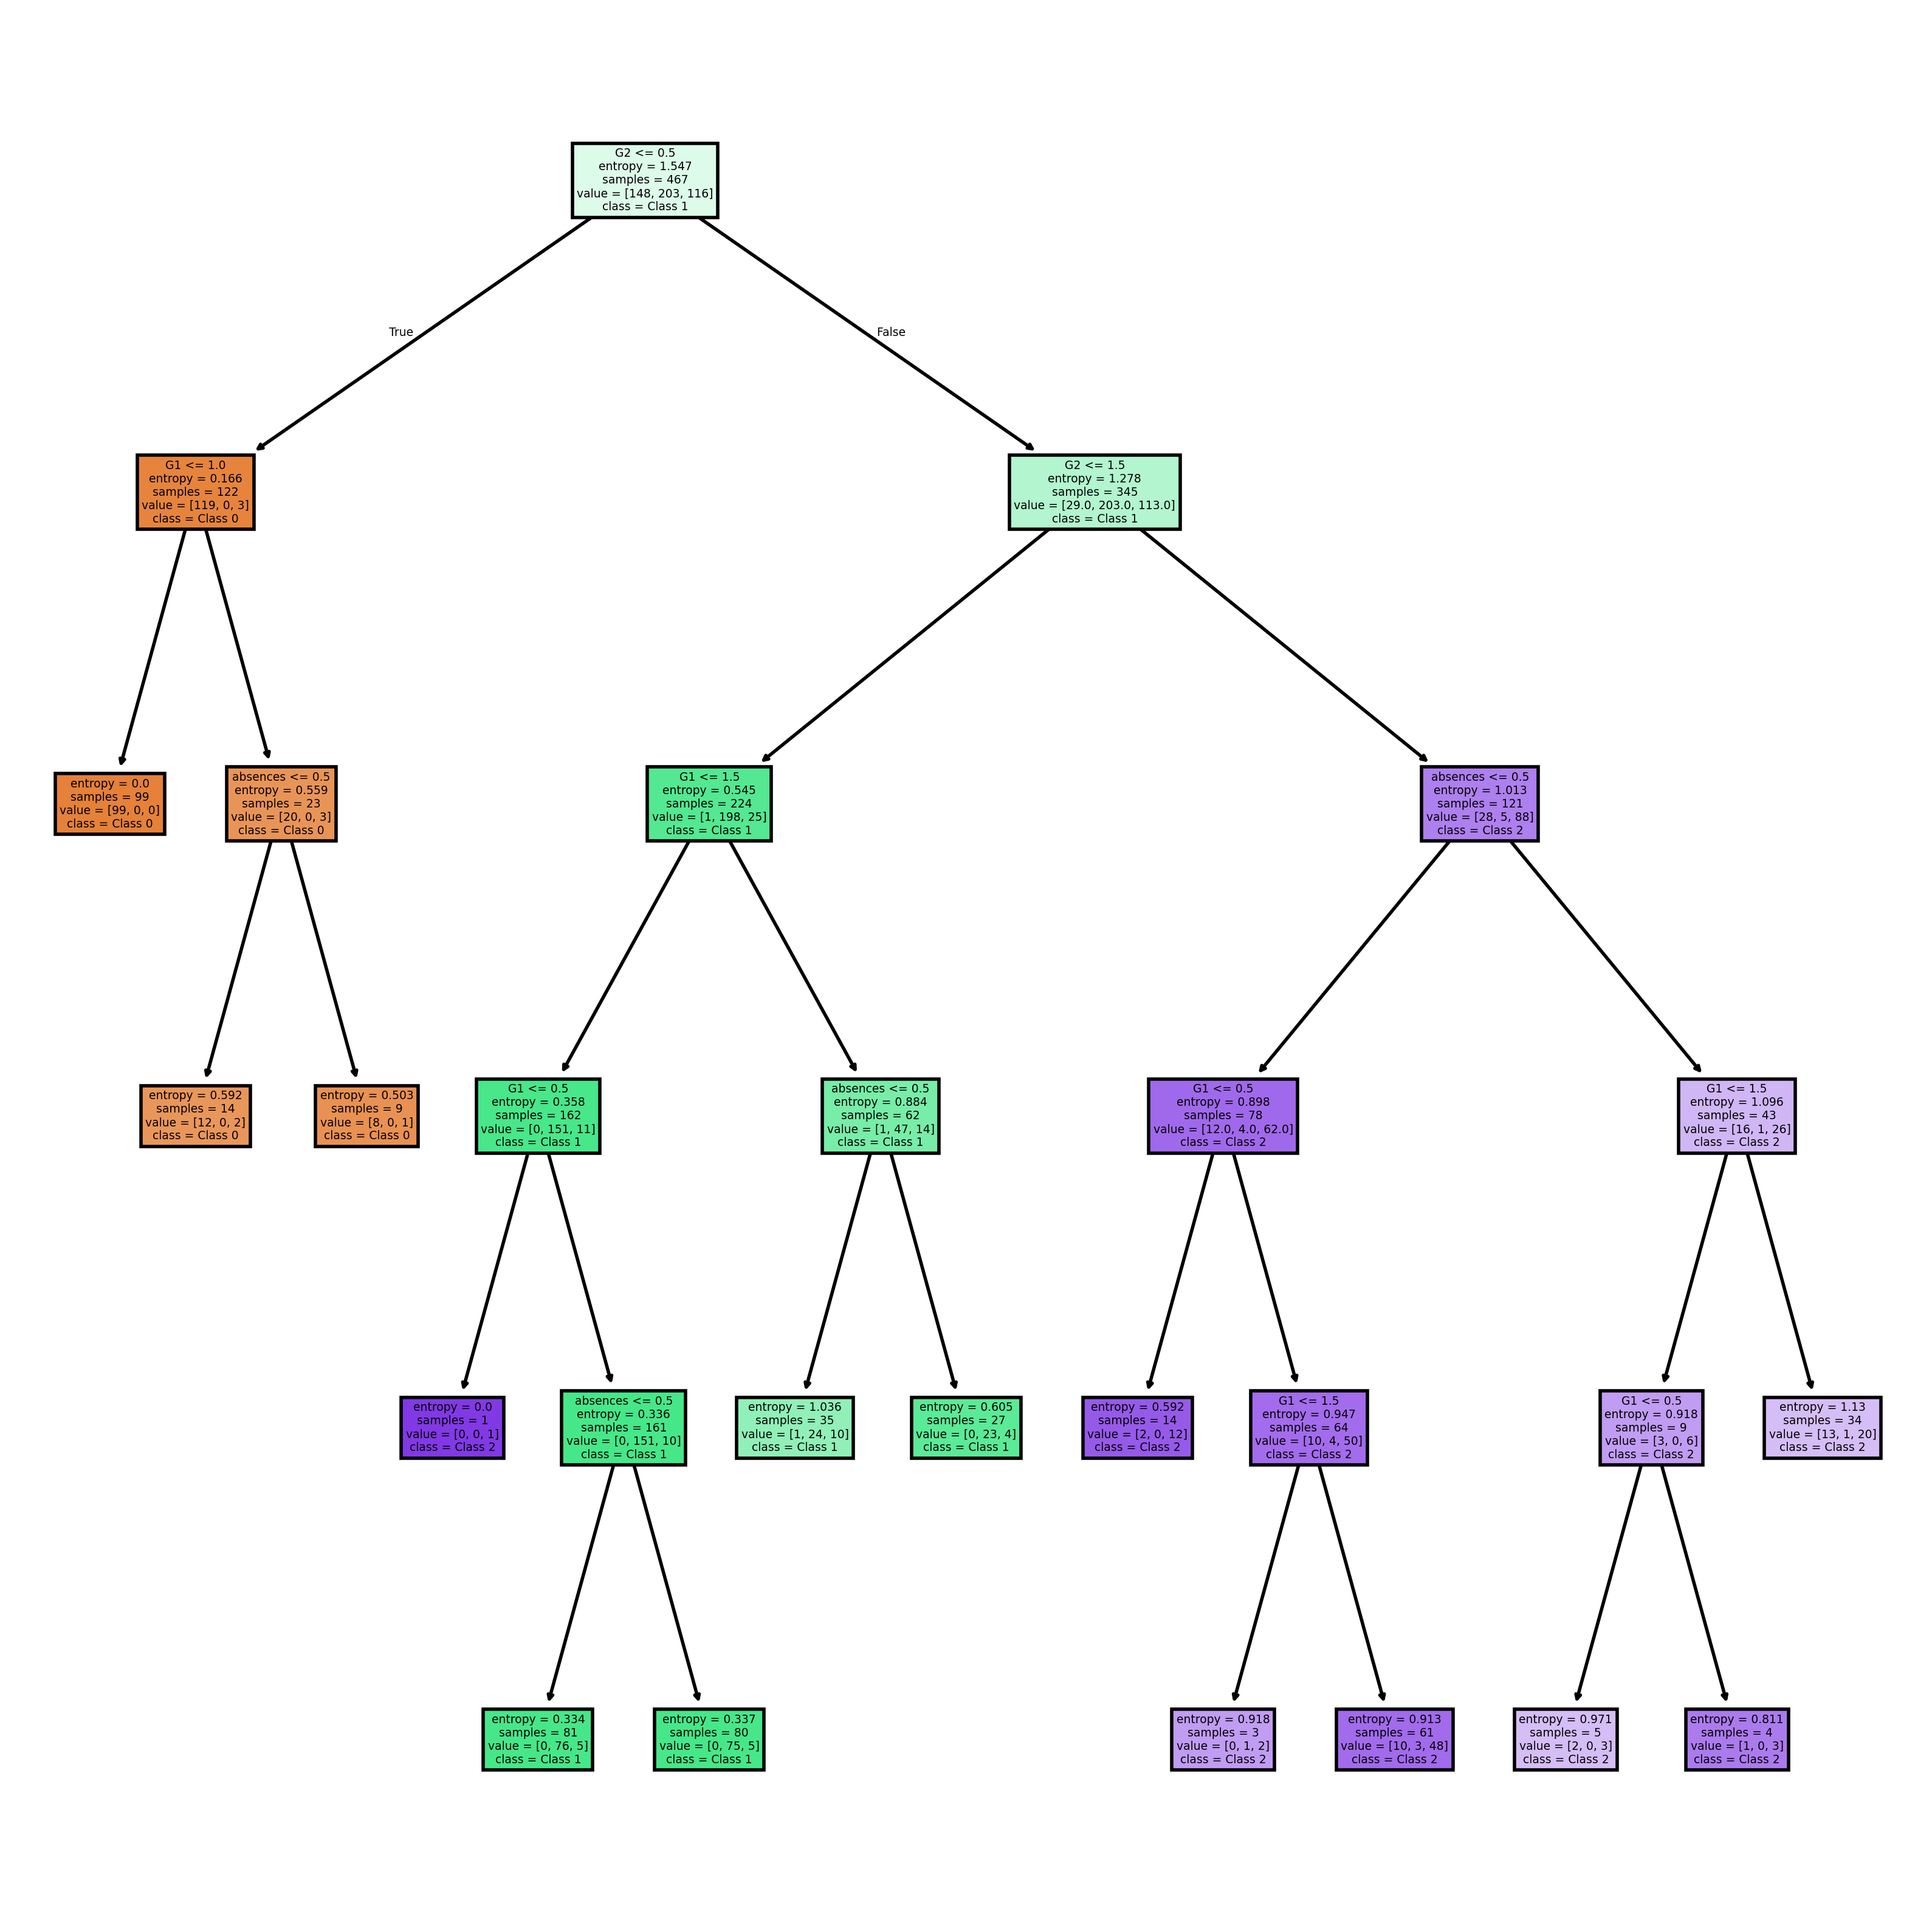

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)
feature_names = X.columns
# Get unique class labels from the target variable
class_labels = {i: f'Class {i}' for i in y_train.unique()}

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=400)
from sklearn.tree import plot_tree
plot_tree(clf,
          feature_names=feature_names,
          # Create a list of class names dynamically
          class_names=[class_labels[i] for i in range(len(class_labels))],
          filled=True)
plt.show()

This Decision Tree shows how the model makes predictions based on the provided data using entropy . It starts from the root node at the top and splits the data step by step based on specific conditions related to features like G3 (grades) or absences.

Root Node:

The first decision is made here. For example, if G3 <= 13.5, the data moves to the "True" branch; otherwise, it moves to the "False" branch.

Internal Nodes:

As the data moves down the tree, it is split further based on other features. The goal is to group similar data together and reduce uncertainty.

Leaf Nodes:

At the bottom of the tree, each leaf shows the final prediction. It also indicates how many samples belong to each class and which class is the majority.

The tree explains which features influence the predictions. For example:

Students with lower grades and high absences might be classified as "Fail."
Students with higher grades are more likely classified as "Pass."
This makes it easier to understand the logic behind the model's decisions.

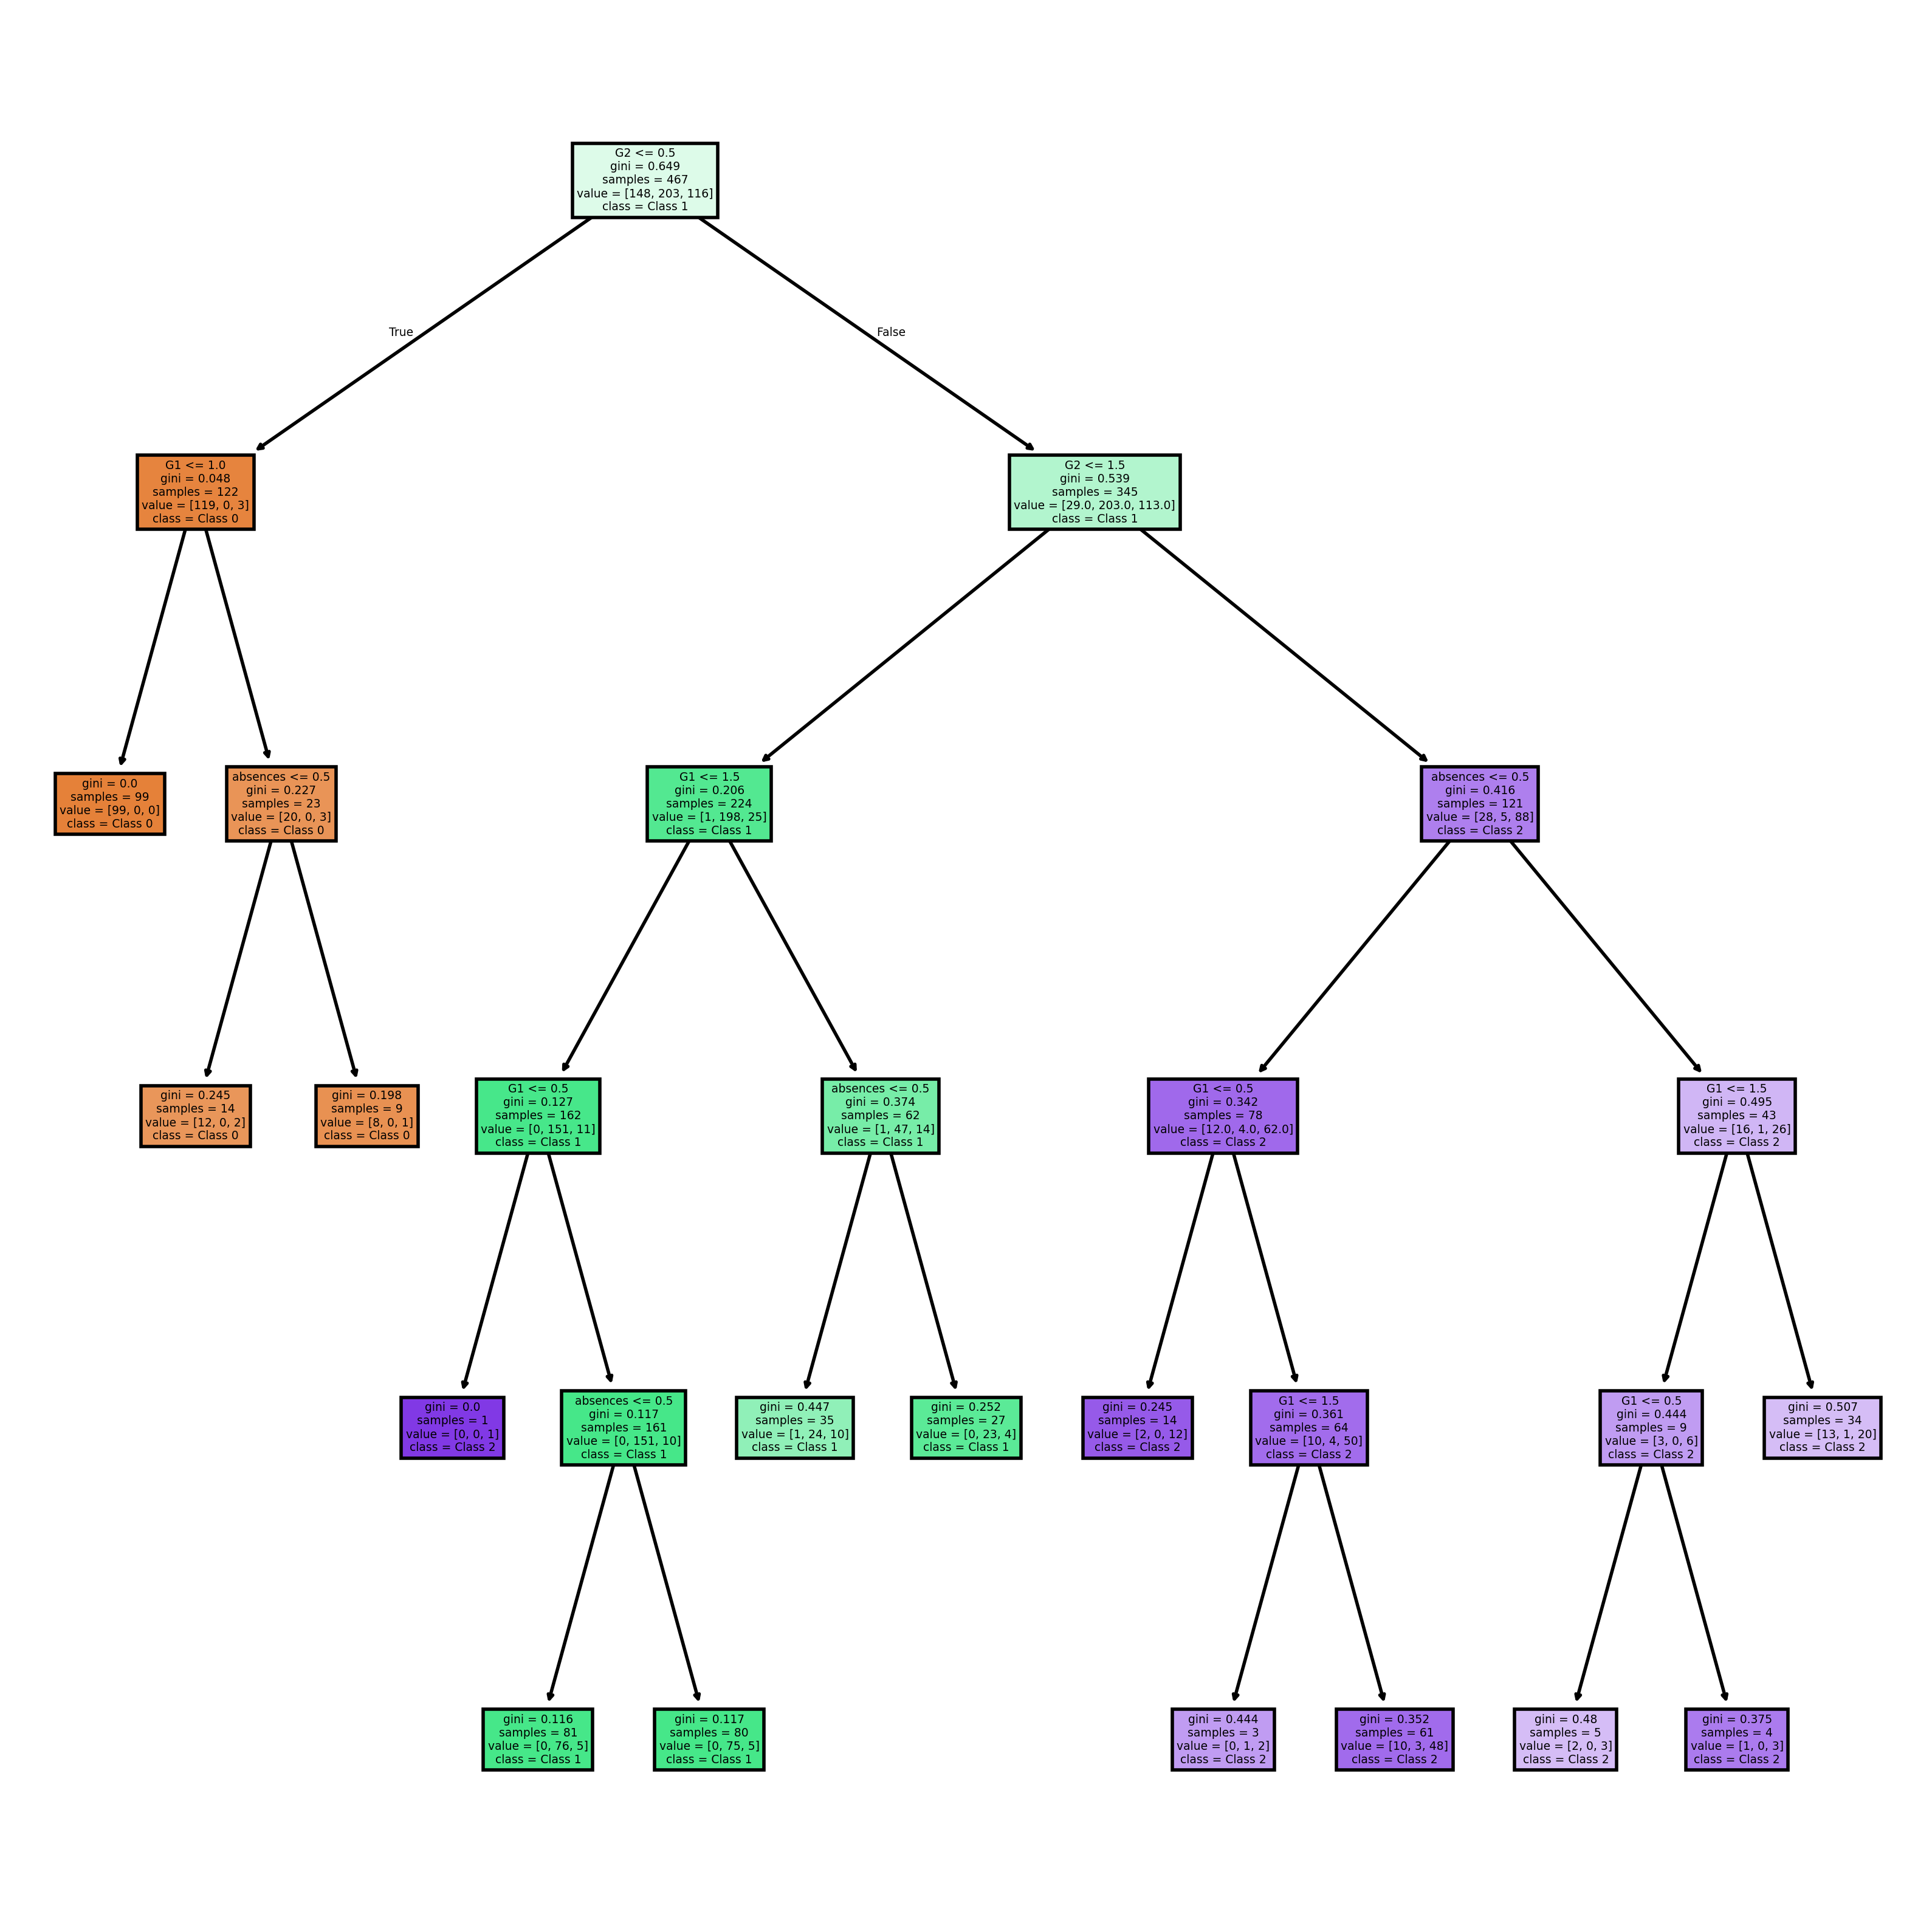

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
feature_names = X.columns
# Get unique class labels from the target variable
class_labels = {i: f'Class {i}' for i in y_train.unique()}

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=400)
from sklearn.tree import plot_tree
plot_tree(clf,
          feature_names=feature_names,
          # Create a list of class names dynamically
          class_names=[class_labels[i] for i in range(len(class_labels))],
          filled=True)
plt.show()

This Decision Tree shows how the model makes predictions based on the provided data using the Gini impurity criterion. It starts at the root node and splits the data step by step based on specific conditions, such as features like G1 (first semester grade), G2 (second semester grade), or Absences.

Root Node:

The first decision is made here. For example, if G1 <= 8.5, the data moves to the "True" branch; otherwise, it moves to the "False" branch.
The feature selected for the root node is the one that minimizes Gini impurity the most at this level.

Internal Nodes:

As the data progresses, it is further split based on other features like G2 and Absences.
At each level, the feature that reduces impurity the most is chosen for splitting. This ensures the groups become as homogenous as possible.

Leaf Nodes:

These are the endpoints of the tree. Each leaf shows the final classification, such as Class 0, 1, or 2.
The distribution of samples in each class and the predicted majority class are displayed at each leaf.

The tree highlights the importance of features in making predictions. For example:

Students with low G1 and high Absences are likely to belong to a lower-performing class.
Students with high G1 and G2 are more likely to be classified into higher-performing classes.
This visualization helps in understanding the model's decision-making process and the relative impact of features like grades and absences.

In [ ]:
import pandas as pd

# Load the uploaded dataset to examine its structure and contents
file_path = 'Processed_dataset.csv'
dataset = pd.read_csv(file_path)

# Display basic information and a preview of the dataset first
dataset.info(), dataset.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   absences  584 non-null    object
 1   G1        584 non-null    object
 2   G2        584 non-null    object
 3   G3        584 non-null    object
dtypes: object(4)
memory usage: 18.4+ KB


(None,
   absences      G1      G2      G3
 0   Medium     Low     Low     Low
 1      Low     Low     Low     Low
 2   Medium  Medium  Medium  Medium
 3      Low    High    High    High
 4      Low  Medium  Medium  Medium)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# Define a mapping for categorical conversion to numerical values
mapping = {'Low': 1, 'Medium': 2, 'High': 3}

# Apply the mapping to all columns
processed_data = dataset.applymap(lambda x: mapping.get(x, x))

# checking
processed_data.info(), processed_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   absences  584 non-null    int64
 1   G1        584 non-null    int64
 2   G2        584 non-null    int64
 3   G3        584 non-null    int64
dtypes: int64(4)
memory usage: 18.4 KB


(None,
    absences  G1  G2  G3
 0         2   1   1   1
 1         1   1   1   1
 2         2   2   2   2
 3         1   3   3   3
 4         1   2   2   2)

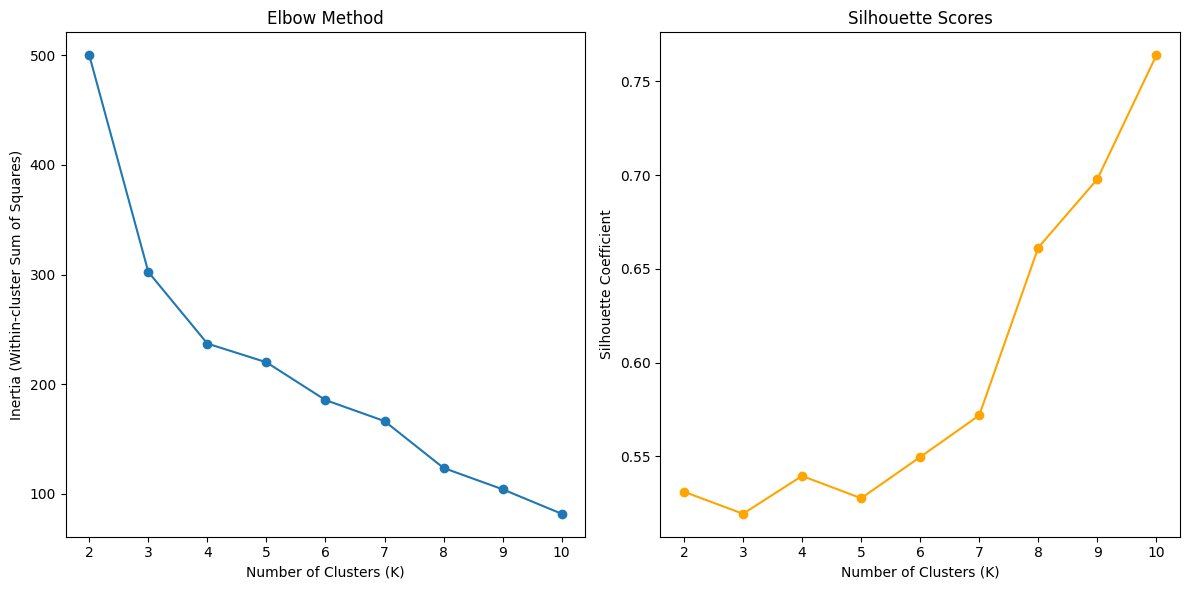

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Prepare data for clustering
X = processed_data.values

# Range of K values to evaluate
k_values = range(2, 11)

# Lists to store evaluation metrics
inertia = []
silhouette_scores = []

# Perform K-means clustering for each K value
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, labels))

# Plot Elbow Method results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-cluster Sum of Squares)")

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Coefficient")

plt.tight_layout()
plt.show()


Elbow Method:

This graph shows the relationship between the number of clusters (K) and the "Within-Cluster Sum of Squares" (WCSS). The WCSS represents the total distance between each data point and the center of its assigned cluster. The graph has a characteristic "elbow" shape, which suggests that the optimal number of clusters is around 5 or 6, as adding more clusters beyond that point doesn't significantly reduce the WCSS.

Silhouette Scores:

The second graph shows the Silhouette Scores for different numbers of clusters (K). The Silhouette Score is a measure of how well each data point fits within its assigned cluster, with a score ranging from -1 to 1. A higher score indicates that the data point is well-matched to its own cluster and poorly matched to other clusters. The graph shows that as the number of clusters increases, the Silhouette Score also increases, indicating that the clustering becomes more effective.

the analysis suggests that the optimal number of clusters is around 5 or 6, as this provides a good balance between the WCSS and the Silhouette Score, which are both important metrics for evaluating the quality of clustering.

K=2 tests minimal clustering.

K=3 aligns with the elbow method's suggestion.

K=5 provides a balance between compactness (inertia) and silhouette score

In [ ]:
# Apply K-means for the selected K values and visualize results
selected_k_values = [2, 3, 5]

# Store clustering results for interpretation
clustering_results = {}

for k in selected_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    clustering_results[k] = labels

    # Calculate metrics
    inertia_value = kmeans.inertia_
    silhouette_value = silhouette_score(X, labels)

    print(f"K={k}: Inertia={inertia_value:.2f}, Silhouette Coefficient={silhouette_value:.2f}")


K=2: Inertia=500.14, Silhouette Coefficient=0.53
K=3: Inertia=302.31, Silhouette Coefficient=0.52
K=5: Inertia=219.86, Silhouette Coefficient=0.53


It performs K-means clustering on a dataset for three specific values of

𝐾

K (2, 3, and 5) to evaluate and compare clustering quality. For each

𝐾

K value, it calculates two metrics—inertia and the Silhouette Coefficient—to assess how well the clustering has been performed.

Inertia: This metric measures the tightness of the clusters by calculating the sum of squared distances between each point and the center of its cluster. Lower inertia values indicate that points are closer to their cluster centers, which usually suggests better-defined clusters.

Silhouette Coefficient: This metric assesses cluster quality by calculating how similar each point is to its own cluster compared to other clusters. Higher silhouette values (closer to 1) indicate that clusters are well-separated and cohesive.

After calculating these metrics, the code prints the results for each

𝐾

K value, allowing for a comparison of clustering performance across different numbers of clusters. This helps in identifying the best

𝐾

K by looking for a balance between low inertia and high silhouette values, which together suggest optimal cluster quality and separation.
